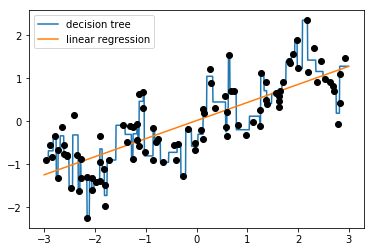

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

tree=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, tree.predict(line), label='decision tree')

reg=LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:,0], y,'o',c='k')
plt.legend()

In [26]:
#binning or discretization
bins=np.linspace(-3,3,11)
which_bins=np.digitize(X, bins=bins)

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoder.fit(which_bins)
X_binned=encoder.transform(which_bins)
X_binned.shape

(100, 10)

In [34]:
line_binned=encoder.transform(np.digitize(line, bins=bins))

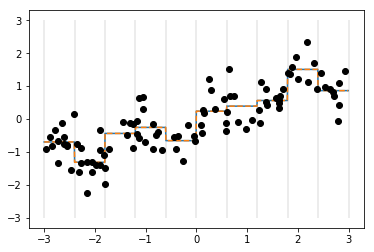

In [46]:
reg=LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression after binning")

tree = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, tree.predict(line_binned),'--', label ="decision tree after binning")

plt.plot(X[:,0],y, 'o', c='k')
plt.vlines(bins,-3,3, linewidth=0.3, alpha=0.5)

In [48]:
#interaction features and polynomial features
X_combined=np.hstack([X, X_binned])
X_combined.shape

(100, 11)

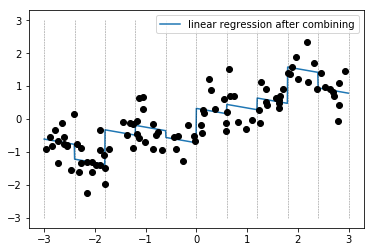

In [59]:
reg=LinearRegression().fit(X_combined,y)
line_combined=np.hstack([line, line_binned])

plt.plot(line,reg.predict(line_combined), label='linear regression after combining')

plt.plot(X[:,0], y, 'o', c='k')

for bin in bins:
    plt.plot([bin, bin],[-3,3], '--',c ='k', linewidth=0.5, alpha=0.5)

plt.legend()

In [61]:
X_product=np.hstack([X_binned, X*X_binned])
X_product.shape

(100, 20)

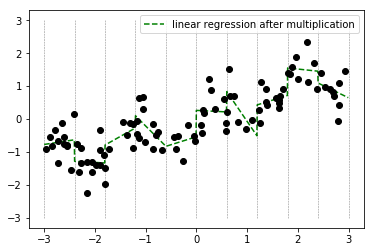

In [66]:
reg=LinearRegression().fit(X_product,y)
line_product=np.hstack([line_binned, line*line_binned])

plt.plot(line, reg.predict(line_product),'--', c='g', label='linear regression after multiplication')
plt.plot(X[:,0],y, 'o',c ='k')

for bin in bins:
    plt.plot([bin, bin], [-3,3], '--', linewidth=0.5, alpha=0.5, c='k')
    
plt.legend(loc='best')

In [71]:
#introducing polynomial features
from sklearn.preprocessing import PolynomialFeatures

#задаем степень полинома 10
poly=PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)
X_poly.shape

(100, 10)

In [75]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

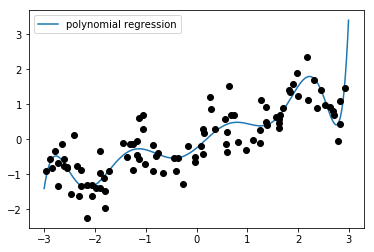

In [81]:
reg=LinearRegression().fit(X_poly, y)

line_poly=poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial regression')
plt.plot(X[:,0],y, 'o',c ='k')
plt.legend()